In [10]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import time
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import matplotlib as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn import metrics
from IPython import display
from mpl_toolkits.mplot3d import Axes3D


sns.set(style="ticks", color_codes=True)

In [ ]:
# refence list of useful functions

col_one_list = df0['one'].tolist() # makes list from col 

col_one_arr = df0['one'].to_numpy() # makes numpy array from col 

df0.drop(df0.loc[df0['one']==0].index, inplace=True) #drops row with value 0 in col 'one'

df0 = pd.concat([df01, df02, df03]) #joins dfs together

df0.drop(["one"], axis=1, inplace=True) # removs col 'one'

df0.apply(pd.to_numeric) # changes all cols to dtype int/float

df0['one'].apply(pd.to_numeric) # changes col 'one' to int/float

df0["one"] = df0["one"].astype(int) #changes col 'one' to any data type (int, bool, etc)

X, y = df0[['one','two']], df0['thress'] # creates x1, x2 from 'one, 'two, and y from 'three'

df0.to_csv('new_csv.csv', index=False) # generates csv in the same folder  

df0=df0.merge(df01, on = 'one', how = 'left') # merges df's i.e. if row0 value of df0['one']== row5 df01['one'] then df01 all 
                                             #other columns values of row5 from df01 gets added to row0 of df0 

In [99]:
df1= pd.read_excel('/Users/ramonmartin/Documents/METIS/project 3/gtdb.xlsx')

In [102]:
df1.shape

(191464, 136)

In [101]:
df2 = df1[["iyear", "imonth", "iday"]].copy()
df2.columns = ["year", "month", "day"]
df2['month'] = np.where(df2.month == 0, 1, df2.month)
df2['day'] = np.where(df2.day == 0, 1, df2.day)
df2["newdate"] = pd.to_datetime(df2)
df1['date']= df2.newdate

In [114]:
df_w = df1.copy()
df_w.shape

(191464, 136)

In [117]:
df_w.drop(["eventid", "approxdate", "extended", "resolution", "specificity", "vicinity", "location", "summary",
          "crit1", "crit2", "crit3", "doubtterr", "alternative", "alternative_txt", "multiple", "attacktype2",
          "attacktype2_txt", "attacktype3", "attacktype3_txt", "targtype1", "targtype1_txt", "targsubtype1",
         "targsubtype1_txt", "corp1", "target1", "natlty1", "natlty1_txt", "targtype2", "targtype2_txt", "targsubtype2",
         "targsubtype2_txt", "corp2", "target2", "natlty2", "natlty2_txt",  "targtype3", "targtype3_txt", "targsubtype3",
         "targsubtype3_txt", "corp3", "target3", "natlty3", "natlty3_txt", "gsubname", "gname2", "gsubname2", "gname3", 
         "gsubname3", "motive", "guncertain1", "guncertain2", "guncertain3", "individual", "nperps", "nperpcap", "claimed",
         "claimmode", "claimmode_txt", "claim2", "claimmode2", "claimmode2_txt",  "claim3", "claimmode3", "claimmode3_txt",
         "compclaim", "weaptype1", "weaptype1_txt", "weapsubtype1", "weapsubtype1_txt", "weaptype2", "weaptype2_txt",
          "weapsubtype2", "weapsubtype2_txt", "weaptype3", "weaptype3_txt", "weapsubtype3", "weapsubtype3_txt","weaptype4", 
          "weaptype4_txt", "weapsubtype4", "weapsubtype4_txt", "weapdetail", "nkillus", "nkillter", "nwoundus", "nwoundte",
          "property", "propextent", "propextent_txt", "propvalue", "propcomment", "ishostkid", "nhostkid", "nhostkidus",
         "nhours", "ndays", "divert", "kidhijcountry", "ransom", "ransomamt", "ransomamtus", "ransompaid", "ransompaidus", 
         "ransomnote", "hostkidoutcome", "hostkidoutcome_txt", "nreleased", "addnotes", "scite1", "scite2", "scite3", 
          "dbsource", "INT_LOG", "INT_IDEO", "INT_MISC", "INT_ANY", "related",], axis=1, inplace=True) 

In [118]:
date = df_w['date']
df_w.drop(labels=['date'], axis=1,inplace = True)
df_w.insert(0, 'date', date)
df_w['imonth'] = np.where(df_w.imonth == 0, 1, df_w.imonth)
df_w['iday'] = np.where(df_w.iday == 0, 1, df_w.iday)
df_w

,date,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,gname,nkill,nwound
0,1970-07-02,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,MANO-D,1.0,0.0
1,1970-01-01,1970,1,1,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),23rd of September Communist League,0.0,0.0
2,1970-01-01,1970,1,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,Unknown,1.0,0.0
3,1970-01-01,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,Unknown,NaN,NaN
4,1970-01-01,1970,1,1,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191459,2018-12-31,2018,12,31,4,Afghanistan,6,South Asia,Zabul,Sorkhi Sang,32.445646,66.876249,1,0,7,Facility/Infrastructure Attack,Taliban,8.0,0.0
191460,2018-12-31,2018,12,31,4,Afghanistan,6,South Asia,Faryab,Khwaja Sabz Posh district,36.057119,64.845477,1,0,7,Facility/Infrastructure Attack,Taliban,NaN,NaN
191461,2018-12-31,2018,12,31,4,Afghanistan,6,South Asia,Jawzjan,Dik Sar,36.229290,65.460288,1,0,9,Unknown,Taliban,1.0,0.0
191462,2018-12-31,2018,12,31,4,Afghanistan,6,South Asia,Helmand,Nad Ali district,31.639085,64.243436,1,0,9,Unknown,Taliban,1.0,3.0


In [119]:
df_w.to_csv('gtdb_adj.csv', index=False)

In [176]:
countrylist = df_w['country_txt'].tolist() 
print(len(countrylist))
countrylist = list(set(countrylist))
print(len(countrylist))
countrylist = sorted(countrylist)
df3= pd.DataFrame() 
se = pd.Series(countrylist)
df3['country_txt']= countrylist
df3

191464
205


,country_txt
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
200,Yemen
201,Yugoslavia
202,Zaire
203,Zambia


In [177]:
yearlist = list()
for i in range(1970, 2019):
    yearlist.append(i)
for yr in yearlist:
    df3[yr]=0
df3

,country_txt,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,Yugoslavia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,Zaire,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
trylist = list(zip(df_w['country_txt'], df_w['iyear']))
trylist2 = countrylist
len(trylist)

191464

In [ ]:
countrylist = df_w['country_txt'].tolist() 
countrylist = list(set(countrylist))
countrylist = sorted(countrylist)
trylist = list(zip(df_w['country_txt'], df_w['iyear']))

trylist2 = countrylist

for i in range(len(trylist)):
    print(trylist[i])
    for j in range(len(trylist2)):
    
        if trylist2[j] == trylist[i][0]:
            df3[int(trylist[i][1])][j] += 1
            
            
            
        

In [205]:
df4 = df3.copy()

for i in range(205):
    x=0
    for yr in yearlist:
        df4[yr][i]+=x
        x = df4[yr][i]
df4

/Users/ramonmartin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_txt,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0,0,0,1,1,1,1,1,1,...,2075,2617,3038,4507,5950,7774,9702,11319,12733,14509
1,Albania,0,0,0,0,0,0,0,0,0,...,70,70,70,70,71,73,77,79,80,80
2,Algeria,0,0,1,1,1,1,2,2,3,...,2513,2613,2628,2669,2691,2704,2719,2728,2742,2749
3,Andorra,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,1,3,...,489,491,491,491,491,491,491,493,499,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,0,0,0,0,0,0,0,0,0,...,202,314,432,744,1169,1932,2596,3121,3348,3673
201,Yugoslavia,0,0,0,1,2,2,2,3,3,...,203,203,203,203,203,203,203,203,203,203
202,Zaire,0,0,3,4,4,4,4,5,5,...,50,50,50,50,50,50,50,50,50,50
203,Zambia,0,1,1,2,2,3,3,4,7,...,60,60,60,60,60,60,60,60,62,62


In [209]:
trylist3 = list(zip(df_w['country_txt'], df_w['region_txt']))
df4["region"]=0
for i in range(len(trylist3)):

    for j in range(len(trylist2)):
    
        if trylist2[j] == trylist3[i][0]:
            df4['region'][j] =  trylist3[i][1]         
    

/Users/ramonmartin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ramonmartin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [211]:
region = df4['region']
df4.drop(labels=['region'], axis=1,inplace = True)
df4.insert(1, 'region', region)
df4

,country_txt,region,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,South Asia,0,0,0,1,1,1,1,1,...,2075,2617,3038,4507,5950,7774,9702,11319,12733,14509
1,Albania,Eastern Europe,0,0,0,0,0,0,0,0,...,70,70,70,70,71,73,77,79,80,80
2,Algeria,Middle East & North Africa,0,0,1,1,1,1,2,2,...,2513,2613,2628,2669,2691,2704,2719,2728,2742,2749
3,Andorra,Western Europe,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Angola,Sub-Saharan Africa,0,0,0,0,0,0,0,1,...,489,491,491,491,491,491,491,493,499,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,Middle East & North Africa,0,0,0,0,0,0,0,0,...,202,314,432,744,1169,1932,2596,3121,3348,3673
201,Yugoslavia,Eastern Europe,0,0,0,1,2,2,2,3,...,203,203,203,203,203,203,203,203,203,203
202,Zaire,Sub-Saharan Africa,0,0,3,4,4,4,4,5,...,50,50,50,50,50,50,50,50,50,50
203,Zambia,Sub-Saharan Africa,0,1,1,2,2,3,3,4,...,60,60,60,60,60,60,60,60,62,62


In [228]:
df4.to_csv('yearsum.csv', index=False)

In [221]:
df_flag= pd.read_csv("/Users/ramonmartin/Documents/METIS/project 3/flags.csv")

df_flag = pd.concat([df_flag['Country Name'], df_flag['Image URL']], axis=1)
df_flag.columns = ['country_txt', 'url']
df_flag

,country_txt,url
0,Angola,https://www.countryflags.io/ao/flat/64.png
1,Burundi,https://www.countryflags.io/bi/flat/64.png
2,Benin,https://www.countryflags.io/bj/flat/64.png
3,Burkina Faso,https://www.countryflags.io/bf/flat/64.png
4,Botswana,https://www.countryflags.io/bw/flat/64.png
...,...,...
210,Solomon Islands,https://www.countryflags.io/sb/flat/64.png
211,Tonga,https://www.countryflags.io/to/flat/64.png
212,Tuvalu,https://www.countryflags.io/tv/flat/64.png
213,Vanuatu,https://www.countryflags.io/vu/flat/64.png


In [226]:
df4=df4.merge(df_flag, on = 'country_txt', how = 'left') # merges df's i.e. if row0 value of df0['one']== row5 df01['one'] then df01 all 
                                             #other columns values of row5 from df01 gets added to row0 of df0 
df4

,country_txt,region,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,url_x,url_y,url
0,Afghanistan,South Asia,0,0,0,1,1,1,1,1,...,4507,5950,7774,9702,11319,12733,14509,https://www.countryflags.io/af/flat/64.png,https://www.countryflags.io/af/flat/64.png,https://www.countryflags.io/af/flat/64.png
1,Albania,Eastern Europe,0,0,0,0,0,0,0,0,...,70,71,73,77,79,80,80,https://www.countryflags.io/al/flat/64.png,https://www.countryflags.io/al/flat/64.png,https://www.countryflags.io/al/flat/64.png
2,Algeria,Middle East & North Africa,0,0,1,1,1,1,2,2,...,2669,2691,2704,2719,2728,2742,2749,https://www.countryflags.io/dz/flat/64.png,https://www.countryflags.io/dz/flat/64.png,https://www.countryflags.io/dz/flat/64.png
3,Andorra,Western Europe,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,https://www.countryflags.io/ad/flat/64.png,https://www.countryflags.io/ad/flat/64.png,https://www.countryflags.io/ad/flat/64.png
4,Angola,Sub-Saharan Africa,0,0,0,0,0,0,0,1,...,491,491,491,491,493,499,499,https://www.countryflags.io/ao/flat/64.png,https://www.countryflags.io/ao/flat/64.png,https://www.countryflags.io/ao/flat/64.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,Middle East & North Africa,0,0,0,0,0,0,0,0,...,744,1169,1932,2596,3121,3348,3673,NaN,NaN,NaN
201,Yugoslavia,Eastern Europe,0,0,0,1,2,2,2,3,...,203,203,203,203,203,203,203,NaN,NaN,NaN
202,Zaire,Sub-Saharan Africa,0,0,3,4,4,4,4,5,...,50,50,50,50,50,50,50,NaN,NaN,NaN
203,Zambia,Sub-Saharan Africa,0,1,1,2,2,3,3,4,...,60,60,60,60,60,62,62,https://www.countryflags.io/zm/flat/64.png,https://www.countryflags.io/zm/flat/64.png,https://www.countryflags.io/zm/flat/64.png


In [227]:
url = df4['url']
df4.drop(labels=['url'], axis=1,inplace = True)
df4.insert(2, 'url', url)
df4

,country_txt,region,url,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,url_x,url_y
0,Afghanistan,South Asia,https://www.countryflags.io/af/flat/64.png,0,0,0,1,1,1,1,...,3038,4507,5950,7774,9702,11319,12733,14509,https://www.countryflags.io/af/flat/64.png,https://www.countryflags.io/af/flat/64.png
1,Albania,Eastern Europe,https://www.countryflags.io/al/flat/64.png,0,0,0,0,0,0,0,...,70,70,71,73,77,79,80,80,https://www.countryflags.io/al/flat/64.png,https://www.countryflags.io/al/flat/64.png
2,Algeria,Middle East & North Africa,https://www.countryflags.io/dz/flat/64.png,0,0,1,1,1,1,2,...,2628,2669,2691,2704,2719,2728,2742,2749,https://www.countryflags.io/dz/flat/64.png,https://www.countryflags.io/dz/flat/64.png
3,Andorra,Western Europe,https://www.countryflags.io/ad/flat/64.png,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,https://www.countryflags.io/ad/flat/64.png,https://www.countryflags.io/ad/flat/64.png
4,Angola,Sub-Saharan Africa,https://www.countryflags.io/ao/flat/64.png,0,0,0,0,0,0,0,...,491,491,491,491,491,493,499,499,https://www.countryflags.io/ao/flat/64.png,https://www.countryflags.io/ao/flat/64.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,Middle East & North Africa,NaN,0,0,0,0,0,0,0,...,432,744,1169,1932,2596,3121,3348,3673,NaN,NaN
201,Yugoslavia,Eastern Europe,NaN,0,0,0,1,2,2,2,...,203,203,203,203,203,203,203,203,NaN,NaN
202,Zaire,Sub-Saharan Africa,NaN,0,0,3,4,4,4,4,...,50,50,50,50,50,50,50,50,NaN,NaN
203,Zambia,Sub-Saharan Africa,https://www.countryflags.io/zm/flat/64.png,0,1,1,2,2,3,3,...,60,60,60,60,60,60,62,62,https://www.countryflags.io/zm/flat/64.png,https://www.countryflags.io/zm/flat/64.png


In [237]:
df_w
df5= df_w.copy()
print(df5.shape)
df5.drop(df5.loc[df5['attacktype1']!=3].index, inplace=True)
df5.shape


(191464, 19)


(91842, 19)

In [238]:
df5.to_csv('ied_only.csv', index=False)

In [243]:
df5.fillna(0, inplace=True)
df5

,date,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,gname,nkill,nwound
3,1970-01-01,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,Unknown,0.0,0.0
7,1970-01-02,1970,1,2,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1,0,3,Bombing/Explosion,Unknown,0.0,0.0
10,1970-01-01,1970,1,1,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,0,0,3,Bombing/Explosion,"Weather Underground, Weathermen",0.0,0.0
15,1970-01-10,1970,1,10,499,East Germany (GDR),9,Eastern Europe,Berlin,Berlin,52.501530,13.401851,1,0,3,Bombing/Explosion,Commune 1,0.0,0.0
17,1970-01-12,1970,1,12,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1,0,3,Bombing/Explosion,Black Nationalists,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191439,2018-12-31,2018,12,31,95,Iraq,10,Middle East & North Africa,Diyala,Nahrawan,33.375760,44.702866,1,0,3,Bombing/Explosion,Unknown,0.0,0.0
191440,2018-12-31,2018,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241967,1,0,3,Bombing/Explosion,Maute Group,2.0,34.0
191442,2018-12-31,2018,12,31,95,Iraq,10,Middle East & North Africa,Diyala,Taha al-Rashid,33.645714,44.694109,1,0,3,Bombing/Explosion,Islamic State of Iraq and the Levant (ISIL),2.0,2.0
191444,2018-12-31,2018,12,31,4,Afghanistan,6,South Asia,Paktika,Sharana district,33.187551,68.712053,1,0,3,Bombing/Explosion,Unknown,2.0,5.0


In [278]:
df6=df_w.copy()
df6.drop(["date", 'iyear', "imonth", "iday", "country", "region", "provstate", "city", "latitude", "longitude",
          "suicide", "attacktype1", "gname", ], axis=1, inplace=True) 
df6

,country_txt,region_txt,success,attacktype1_txt,nkill,nwound
0,Dominican Republic,Central America & Caribbean,1,Assassination,1,0.0
1,Mexico,North America,1,Hostage Taking (Kidnapping),0,0.0
2,Philippines,Southeast Asia,1,Assassination,1,0.0
3,Greece,Western Europe,1,Bombing/Explosion,0,0.0
4,Japan,East Asia,1,Facility/Infrastructure Attack,0,0.0
...,...,...,...,...,...,...
191459,Afghanistan,South Asia,1,Facility/Infrastructure Attack,8,0.0
191460,Afghanistan,South Asia,1,Facility/Infrastructure Attack,0,0.0
191461,Afghanistan,South Asia,1,Unknown,1,0.0
191462,Afghanistan,South Asia,1,Unknown,1,3.0


In [279]:
df6.to_csv('atktypes.csv', index=False)

In [280]:
df7=pd.read_csv("/Users/ramonmartin/Documents/METIS/project 3/AOAV.csv")
df7.drop(['Armed Actors/ Security Personnel Injured', 'Armed Actors/ Security Personnel Killed', 'Civilians Injured', 'Civilians Killed'])

,Armed Actors/ Security Personnel Casualties Total,Armed Actors/ Security Personnel Injured,Armed Actors/ Security Personnel Killed,Civilian Casualties Total,Civilians Injured,Civilians Killed,Country,Date,Description,Weapon Type
0,0,0,0,54,40,14,Nigeria,2010-10-01,Explosion at independence event,Car Bomb
1,3,1,2,7,6,1,Iraq,2010-10-01,Bomb at checkpoint,Roadside Bomb
2,3,1,2,0,0,0,Afghanistan,2010-10-01,Two soldiers killed by IED,Non-specific IED
3,0,0,0,2,2,0,Afghanistan,2010-10-04,IED in Kandahar,Non-specific IED
4,5,4,1,0,0,0,Iraq,2010-10-04,Bomb hits car carrying Iraqi minister,Roadside Bomb
...,...,...,...,...,...,...,...,...,...,...
11760,1,1,0,0,0,0,Syria,2019-09-30,IED exploded in car of Jaysh al-Thawra faction...,Non-specific IED
11761,1,0,1,0,0,0,Syria,2019-11-03,Leader of “al-Jabha al-Shamia” fatally injured...,Non-specific IED
11762,1,1,0,0,0,0,Syria,2019-11-14,IED explodes in military vehicle of a member o...,Non-specific IED
11763,0,0,0,1,1,0,Philippines,2019-12-22,1 wounded in IED explosion at a site of a trad...,Non-specific IED


In [266]:
df_w.fillna(0, inplace=True)
df_w['nkill'] = df_w['nkill'].apply(np.int64)
df_w.dtypes

date               datetime64[ns]
iyear                       int64
imonth                      int64
iday                        int64
country                     int64
country_txt                object
region                      int64
region_txt                 object
provstate                  object
city                       object
latitude                  float64
longitude                 float64
success                     int64
suicide                     int64
attacktype1                 int64
attacktype1_txt            object
gname                      object
nkill                       int64
nwound                    float64
dtype: object

In [275]:
from sklearn.model_selection import train_test_split
X, y = df_w[['iyear', 'suicide']], df_w['nkill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7) 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1800)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.005380119056856869

In [276]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))



RMSE(rf.predict(X_test),y_test)

10.036033341343293

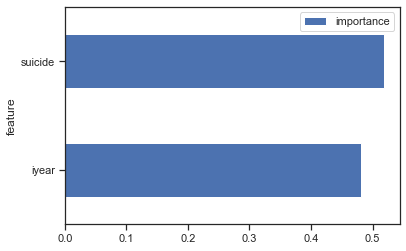

In [274]:
xlbl=('iyear', 'suicide')
feat_imps = list(zip(xlbl,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])



feat_imps.plot.barh(x='feature',y='importance')